In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

### Import Dataset

In [3]:
# visit dataset
v = pd.read_csv("visits.csv")
v.sample(5)

,first_name,last_name,email,gender,visit_date
2362,Jesus,Riddle,JR6703@gmail.com,male,7-4-17
5058,Leroy,Sheppard,LeroySheppard19@gmail.com,male,9-21-17
5220,Louise,Keith,Louise.Keith@gmail.com,female,9-24-17
1293,Hilda,Booker,Hilda.Booker@gmail.com,female,7-14-17
1832,Jackie,Fischer,JFischer1987@gmail.com,female,7-22-17


In [4]:
# fitness test
ft = pd.read_csv("fitness_tests.csv")
ft.sample(5)

,first_name,last_name,email,gender,fitness_test_date
1436,Zachary,Harding,Zachary.Harding@gmail.com,male,2017-09-02
1855,Paula,Melendez,PaulaMelendez44@gmail.com,female,2017-09-20
985,Willie,Pickett,WPickett1988@hotmail.com,female,2017-08-18
964,Donald,Maldonado,DM8639@gmail.com,male,2017-08-15
2340,Alfred,Acosta,Alfred.Acosta@gmail.com,male,2017-09-08


In [5]:
# applications
a = pd.read_csv("applications.csv")
a.sample(5)

,first_name,last_name,email,gender,application_date
42,Derek,Bond,DB7934@gmail.com,male,2017-08-03
525,Joseph,Travis,Joseph.Travis@gmail.com,male,2017-07-26
480,Rodney,Sawyer,RodneySawyer76@gmail.com,male,2017-07-12
73,Ted,Burt,TBurt1974@gmail.com,male,2017-08-04
220,Connie,Harrell,CHarrell1988@gmail.com,female,2017-09-24


In [6]:
# purchases
p = pd.read_csv("purchases.csv")
p.sample(5)

,first_name,last_name,email,gender,purchase_date
7,Michele,Albert,MA7730@gmail.com,female,2017-09-10
224,Enrique,Jefferson,EnriqueJefferson51@gmail.com,male,2017-08-16
187,Maureen,Herring,MH3207@gmail.com,female,2017-08-18
355,Benjamin,Richard,BRichard1973@gmail.com,male,2017-08-20
293,Gail,Melendez,GailMelendez46@gmail.com,female,2017-09-05


### Analysis

**1) Pull data where visit_date is on or after 7-1-17**

In [7]:
vd = v[v["visit_date"] >= "7-1-17"]
vd      

,first_name,last_name,email,gender,visit_date
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17
1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17
...,...,...,...,...,...
5995,Rachel,Hensley,RachelHensley38@gmail.com,female,9-9-17
5996,Leon,Harmon,Leon.Harmon@gmail.com,male,9-9-17
5997,Andy,Pratt,AndyPratt27@gmail.com,male,9-9-17
5998,Ruben,Nielsen,RubenNielsen93@hotmail.com,male,9-9-17


**2) Left join ft, a, p with vd**

In [8]:
df = pd.merge(vd, ft, how = "left", on = ["first_name", "last_name", "email"])
df = pd.merge(df, a, how = "left", on = ["first_name", "last_name", "email"])
df = pd.merge(df, p, how = "left", on = ["first_name", "last_name", "email"])
df

,first_name,last_name,email,gender_x,visit_date,gender_y,fitness_test_date,gender_x,application_date,gender_y,purchase_date
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,female,2017-07-03,NaN,NaN,NaN,NaN
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,male,2017-07-02,NaN,NaN,NaN,NaN
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,NaN,male,2017-07-04,male,2017-07-04
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,male,2017-07-01,male,2017-07-03,male,2017-07-05
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,female,2017-07-02,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4999,Rachel,Hensley,RachelHensley38@gmail.com,female,9-9-17,NaN,NaN,NaN,NaN,NaN,NaN
5000,Leon,Harmon,Leon.Harmon@gmail.com,male,9-9-17,male,2017-09-15,NaN,NaN,NaN,NaN
5001,Andy,Pratt,AndyPratt27@gmail.com,male,9-9-17,male,2017-09-15,NaN,NaN,NaN,NaN
5002,Ruben,Nielsen,RubenNielsen93@hotmail.com,male,9-9-17,NaN,NaN,male,2017-09-13,NaN,NaN


**Column for identify group**

In [9]:
df["ab_test_group"] = df["fitness_test_date"].apply(lambda x: "A" if pd.notnull(x) else "B")

In [10]:
df.head()

,first_name,last_name,email,gender_x,visit_date,gender_y,fitness_test_date,gender_x,application_date,gender_y,purchase_date,ab_test_group
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,female,2017-07-03,NaN,NaN,NaN,NaN,A
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,male,2017-07-02,NaN,NaN,NaN,NaN,A
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,NaN,male,2017-07-04,male,2017-07-04,B
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,male,2017-07-01,male,2017-07-03,male,2017-07-05,A
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,female,2017-07-02,NaN,NaN,NaN,NaN,A


**Count AB groups**

In [11]:
AB = df["ab_test_group"].value_counts().to_frame().reset_index()
AB.columns = ["Test Group", "Total"]
AB

,Test Group,Total
0,A,2504
1,B,2500


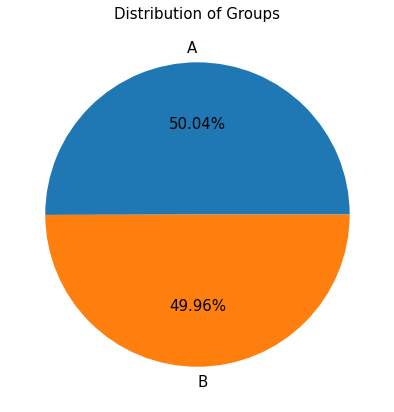

In [12]:
# Pie Chart
plt.figure(figsize = (18, 7))
plt.pie(AB["Total"], labels = ["A", "B"], autopct = "%0.2f%%", textprops={'fontsize': 15})
plt.title("Distribution of Groups", size = 15)
plt.show()

**3) Application**

In [13]:
df["is_application"] = df["application_date"].apply(lambda x: "Application" if pd.notnull(x) else "No Application")

In [14]:
# Total Applications
ap = df["is_application"].value_counts().to_frame().reset_index()
ap.columns = ["Status", "Total"]
ap

,Status,Total
0,No Application,4429
1,Application,575


**How many people from Group A and Group B either do or don't pick up an application**

In [15]:
group_applications = df.groupby(["ab_test_group", "is_application"])["is_application"].agg(["count"]).reset_index()
group_applications

,ab_test_group,is_application,count
0,A,Application,250
1,A,No Application,2254
2,B,Application,325
3,B,No Application,2175


**Calculate the percent of people in each group who complete an application**

In [54]:
pivot_ga = group_applications.pivot(columns = "is_application", index = "ab_test_group", values = "count").reset_index()
pivot_ga

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


In [56]:
# Check Percentages
pivot_ga["Total"] = pivot_ga["Application"] + pivot_ga["No Application"]
pivot_ga["Percentage"] = ((pivot_ga["Application"] / pivot_ga["Total"]) * 100).round(2)
pivot_ga

is_application,ab_test_group,Application,No Application,Total,Percentage
0,A,250,2254,2504,9.98
1,B,325,2175,2500,13.00


**It looks like more people from Group B turned in an application. We need to know if this difference is statistically significant.**

In [18]:
contingency = [[250, 2504], [325, 2175]]
chi2_contingency(contingency)

(20.284427131424987,
 6.6741608485702995e-06,
 1,
 array([[ 301.39893415, 2452.60106585],
        [ 273.60106585, 2226.39893415]]))

**4) Membership**

In [19]:
df["is_member"] = df["purchase_date"].apply(lambda x: "Member" if pd.notnull(x) else "No Member")

In [20]:
m = df["is_member"].value_counts().to_frame().reset_index()
m.columns = ["Status", "Total"]
m

,Status,Total
0,No Member,4554
1,Member,450


**Let's create a DataFrame called just_apps the contains only people who picked up an application.**

In [21]:
just_apps = df[df["is_application"] == "Application"]
just_apps[0:5]

,first_name,last_name,email,gender_x,visit_date,gender_y,fitness_test_date,gender_x,application_date,gender_y,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,NaN,male,2017-07-04,male,2017-07-04,B,Application,Member
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,male,2017-07-01,male,2017-07-03,male,2017-07-05,A,Application,Member
9,Salvador,Cardenas,SCardenas1980@gmail.com,male,7-1-17,male,2017-07-07,male,2017-07-06,NaN,NaN,A,Application,No Member
11,Valerie,Munoz,VMunoz1998@gmail.com,female,7-1-17,female,2017-07-03,female,2017-07-05,female,2017-07-06,A,Application,Member
35,Michael,Burks,MB9820@gmail.com,male,7-1-17,NaN,NaN,male,2017-07-07,male,2017-07-13,B,Application,Member


**Let's do a groupby to find out how many people in just_apps are and aren't members from each group**

In [22]:
agm = just_apps.groupby(["ab_test_group", "is_member"])["first_name"].agg(["count"]).reset_index()

In [23]:
agm

,ab_test_group,is_member,count
0,A,Member,200
1,A,No Member,50
2,B,Member,250
3,B,No Member,75


In [24]:
agm_pivot = agm.pivot(columns = "is_member", index = "ab_test_group", values = "count").reset_index()
agm_pivot["Total"] = agm_pivot["Member"] + agm_pivot["No Member"] 
agm_pivot["Percentage"] = ((agm_pivot["Member"] / agm_pivot["Total"]) * 100).round(2)
agm_pivot

is_member,ab_test_group,Member,No Member,Total,Percentage
0,A,200,50,250,80.00
1,B,250,75,325,76.92


**It looks like people who took the fitness test were more likely to purchase a membership if they picked up an application**

In [25]:
contingency = [[200, 50], [250, 75]]
chi2_contingency(contingency)

(0.615869230769231,
 0.43258646051083327,
 1,
 array([[195.65217391,  54.34782609],
        [254.34782609,  70.65217391]]))

**5) what percentage of all visitors purchased memberships.**

In [35]:
vm = df.groupby(["ab_test_group", "is_member"])["is_member"].agg(["count"]).reset_index()
vm_pivot = vm.pivot(columns = "is_member", index = "ab_test_group", values = "count").reset_index()
vm_pivot["Total"] = vm_pivot["Member"] + vm_pivot["No Member"]
vm_pivot["Percentage"] = ((vm_pivot["Member"] / vm_pivot["Total"]) * 100).round(2)
vm_pivot

is_member,ab_test_group,Member,No Member,Total,Percentage
0,A,200,2304,2504,7.99
1,B,250,2250,2500,10.00


**There might be a significant different in memberships between Group A and Group B**

In [36]:
contingency = [[200, 2304], [250, 2250]]
chi2_contingency(contingency)

(5.949182292591156,
 0.014724114645783203,
 1,
 array([[ 225.17985612, 2278.82014388],
        [ 224.82014388, 2275.17985612]]))

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:

- Percent of visitors who apply

- Percent of applicants who purchase a membership

- Percent of visitors who purchase a membership

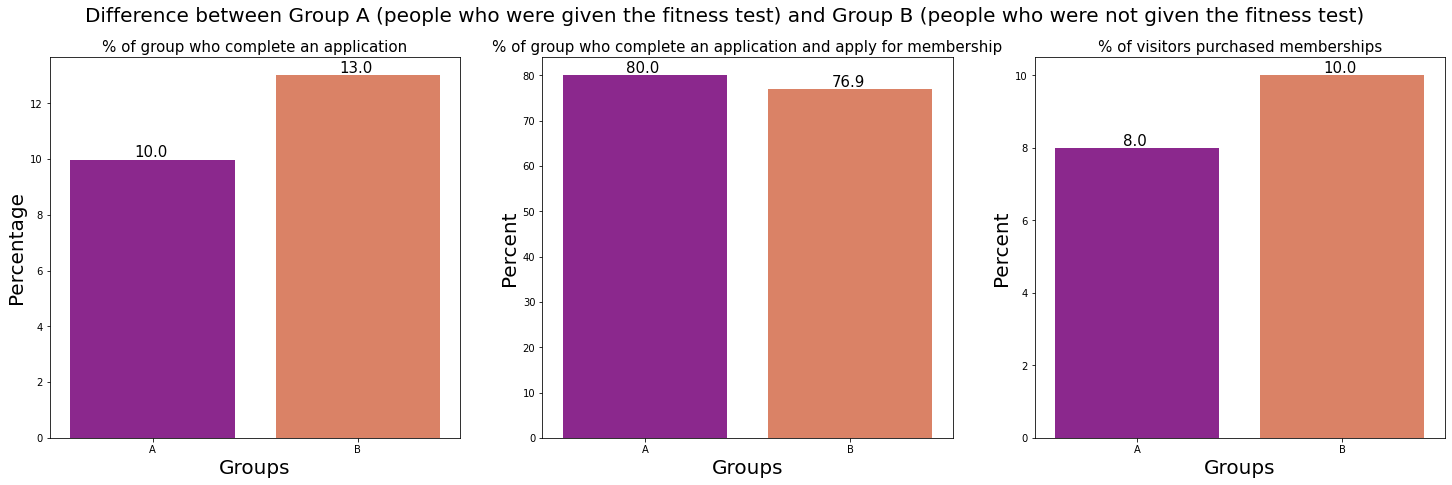

In [66]:
fig, axes = plt.subplots(1, 3,  figsize = (25, 7))
fig.suptitle("Difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test)", fontsize = 20)

# Hours Graph
graph = sns.barplot(ax = axes[0], x = "ab_test_group", y = "Percentage", data = pivot_ga, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', fontsize = 15)
axes[0].set_title("% of group who complete an application", size = 15)
axes[0].set_xlabel("Groups", size = 20)
axes[0].set_ylabel("Percentage", size = 20)

# Score Graph
g = sns.barplot(ax = axes[1], x = "ab_test_group", y = "Percentage", data = agm_pivot, palette = "plasma")
for p in g.patches:
        g.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
axes[1].set_title("% of group who complete an application and apply for membership", size = 15)
axes[1].set_xlabel("Groups", size = 20)
axes[1].set_ylabel("Percent", size = 20)

g = sns.barplot(ax = axes[2], x = "ab_test_group", y = "Percentage", data = vm_pivot, palette = "plasma")
for p in g.patches:
        g.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
axes[2].set_title("% of visitors purchased memberships", size = 15)
axes[2].set_xlabel("Groups", size = 20)
axes[2].set_ylabel("Percent", size = 20)

plt.show()